### CS164 Assignment 1

##Unconstrained & Equality Constrained Optimization
_Yoav Rabinovich, Feb 2020_

------------------------------

#### Problem Description:

_Consider a roof drainage channel made with a single sheet of metal, bent in two places to create a trapezoidal cross-section. The channel is open on top and is required to carry the largest amount of water possible. The left-hand edge of the channel is bent upwards at 90◦, since it has to be bolted onto the wall just underneath the roof._

_We wish to compute the base length $b$, length of the right-hand side bent segment $a$, as well as the angle at which it is bent $\theta$ in order to maximize the cross-sectional area. Note that the height to which the left-hand end needs to be bent is determined from $a$ and $\theta$. We are given that the width of the metal sheet is $W = 3 \ m$, which then allows $b$ to be determined also._

#### Part 1

_Compute an expression for the cross-sectional area of the channel $A$ as a function of $a$ and $\theta$ only. Produce both a surface plot and a contour plot of the function $A(a, \theta)$, over the domain of physically-realistic values for $a$ and $\theta$._

Using the formula of the area of a triangle and the area of a square, summed to compose the right angled trapeze, using the basic trigonometric identities and using WolframAlpha for derivatives:

$$\begin{align} A &= h(b+c/2) \\
h &= a\sin{\theta} \\
b &= 3-a-h \\
&= 3-a(1+\sin{\theta}) \\
c &= acos{\theta} \\
A &= a\sin{\theta}(3-a(1+\sin{\theta})+\frac{acos{\theta}}{2}) \\
A_a &= \sin{\theta}(-2a\sin{\theta}+a\cos{\theta}-2a+3) \\
A_\theta &= \frac{a}{2}(-a\sin^2{\theta}+a\cos^2{\theta}-2\cos{\theta}(2a\sin{\theta}+a-3)) \\
\end{align}$$

2D and 3D plots available below, in the code section.

**NOTE**: Throughout this analysis I sometimes flip the sign of the area function as well as the gradients, since I find gradient descent to be more intuitive than ascent, and to fit my existing code. I emphasize that we can aim to maximize $A$ by minimizing $-A$ without loss of generality. I also use the terms "cost function" and "minimum" where appropriate instead of "reward function" and "maximum".



**(a)** _Estimate the values of $a$ and $\theta$ that maximize the area from your plot. Does the maximum appear to be unique over the domain of physically-realistic values? Justify your answer._

Yes. The plot below is constrained to physical values: $\theta$ is bound between $(0,\pi]$ since a lower angle will result in no cross-sectional area and let water spill, and a higher angle will trivially reduce the cross-sctional area by making the side $a$ directly detract from it. $a$, as a length, is positive, and it's bound by $W=3$ in the edge case where $\theta=0$. However, the constraint that the left hand side rise to meet the height of $a$ means that the length of $a$ has a constraint that's dependent on $\theta$ for values where $a>1.5$: In this regieme, $a < W-h = 3-a\cos{\theta}$. Therefore, after examining the range $a \in [0,3]$ to find a single minimum which lies below this critical value of $a$, I narrowed the range down to $[0,1.5]$ to avoid plotting regions where $A$ isn't defined and provide a better visualization of the gradient descent.

A visual examination shows the entire domain of the function to include a single minimum at around $(1,1)$, with a negative corss-sectional area of around $-1.2$. As this is the only minimum in the domain, with all boundary points higher that it, no other solution exists with an equal or lower value.

**(b)** _Determine whether or not the negated function $−A(a, \theta)$ is coercive, justifying your answer._

A function is coercive if $\lim_{||\mathbf{x}||\rightarrow +\infty}f(\mathbf{x})=+\infty$, that is it goes to positive infinity in all directions where the magnitude of $\mathbf{x}$ goes to positive infinity.

Intuitively, for the negative area to reach infinity at any point, the area must reach negative infinity, while an area is not defined at negative values, which immediately brings to light a contradiction. Indeed, the domain we considered as physically-realistic are bounded, and their values of the negative-area function is non-positive as expected.

To determined if the function is coercive given a non-physical domain of $\mathbb{R}^2$, we can look at the leading terms when our values approach infinity. Since $\theta$ only appears in the area function in oscillating trigonometric functions with a bounded magnitude and never in a denominator, it does not contribute to exploding terms. Therefore, for at least one direction (constant $a$), the function remains bounded, meaning that even in an unbounded domain the function isn't coercive.

#### Part 2

_Using multivariable calculus, find the exact values of $a$ and $\theta$ that maximize the cross-sectional area of the channel. To accomplish this, consider $b$ as a variable and use Lagrange multipliers on the area function $A(a, b, \theta)$, constraining the three variables by the width of the sheet - this will simplify calculations compared to maximizing $A(a, \theta)$ directly. Prove that the solution you found maximizes the area by applying appropriate tests, assuming the domain is restricted to physically-realistic solutions._

First we define the reward function, constraint function and Lagrangian:

$$\begin{align} \\
f(a, b, \theta) &= h(b+c/2) \\
&= a\sin{\theta}(b+\frac{acos{\theta}}{2}) \\
g(a, b, \theta) &= a+b+h = W = 3\\
&= a+b+a\sin{\theta} \\
\mathcal{L}(a, b, \theta, \lambda) &= f(\mathbf{x})-\lambda(g(\mathbf{x})-W) \\
&= ab\sin{\theta}+\frac{a^2\sin{\theta}\cos{\theta}}{2} -\lambda(a+b+a\sin{\theta}-3) 
\end{align}$$

By enforcing that $\nabla \mathcal{L} = \mathbf{0}$, we get a system of linear equation that allows us to solve for the point where the gradients of both functions are parallel:

$$\nabla \mathcal{L} = \begin{bmatrix}
\mathcal{L}_a(a, b, \theta, \lambda)\\ 
\mathcal{L}_b(a, b, \theta, \lambda)\\ 
\mathcal{L}_\theta(a, b, \theta, \lambda)\\
\mathcal{L}_\lambda(a, b, \theta, \lambda)
\end{bmatrix} = \begin{bmatrix}
\sin{\theta}(a\cos{\theta}+b-\lambda)-\lambda\\
a\sin{\theta}-\lambda\\
\frac{a}{2}(-a\sin^2{\theta}+a\cos^2{\theta}-2(\lambda-b)\cos{\theta}) \\
3-a-b-a\sin{\theta}
\end{bmatrix} = \begin{bmatrix}
0\\
0\\
0\\
0
\end{bmatrix}$$

Giving us 5 (families of) solutions, only one of which falls inside our realistic domain: $(a^*,b^*,\theta^*,\lambda^*) = (4\sqrt{3}-6,3+\sqrt{3},\frac{\pi}{3},6-3\sqrt{3}) \approx (0.928,4.732,1.047,0.804)$
Where the gradient and the solution were computed with the help of WolframAlpha. $\lambda$ is the lagrangian multiplier which in addition to being useful in solving the system, measures the sensitivity of the value of the reward function $f = A$ at the solution point to changes in the condition $W$.



We can confirm that this critical point is indeed a maximum of the reward function by using the bordered Hessian second order test. We compose the bordered Hessian, and plug in the solution:

$$\begin{align} H(\mathcal{L}) &= \begin{bmatrix}
0 & \nabla g^T\\ 
\nabla g &  H(f)
\end{bmatrix} = \begin{bmatrix}
0 &  g_a & g_b & g_\theta  \\
g_\lambda & f_{aa} & f_{ab} & f_{a\theta} \\
g_a & f_{ba} & f_{bb} & f_{b\theta} \\
g_b & f_{\theta a} & f_{\theta b} & f_{\theta\theta}\\
\end{bmatrix} \\
&= \begin{bmatrix}
0 & \sin{\theta}+1 & 1 & a\cos{\theta} \\
\sin{\theta}+1 & \sin{\theta}\cos{\theta} & \sin{\theta} & \cos{\theta}(\frac{a}{2}\cos{\theta}+b)-a\sin^2{\theta}+\frac{a}{2}\cos^2{\theta} \\
1 & \sin{\theta} & 0 & a\cos{\theta}\\
a\cos{\theta} & \cos{\theta}(\frac{a}{2}\cos{\theta}+b)-a\sin^2{\theta}+\frac{a}{2}\cos^2{\theta} & a\cos{\theta} & -\frac{3a^2}{2}\sin^2{\theta}\cos{\theta}-a\sin{\theta}(\frac{a}{2}\cos{\theta}+b)\\
\end{bmatrix} \\
H(\mathcal{L}^*)&= \begin{bmatrix}
0 & \sin{\frac{\pi}{3}}+1 & 1 & 2\sqrt{3} \\
\sin{\frac{\pi}{3}}+1 & \frac{\sin{\frac{\pi}{3}}}{2} & \sin{\frac{\pi}{3}} & \frac{3+\sqrt{3}}{2} \\
1 & \sin{\frac{\pi}{3}} & 0 & 2\sqrt{3}\\
2\sqrt{3} & \frac{3+\sqrt{3}}{2} & 2\sqrt{3} & -16-\sin{\frac{\pi}{3}}(12+6\sqrt{3})\\
\end{bmatrix}
\end{align}$$

Using WolframAlpha for differentiation. We now need to examine the signs of leading principal minors of the bordered Hessian, being the determinants of submatrices along the diagonal which contain the top-left element. However, we skip the first two submatrices in this single-constraint case since it does not include enough information about the problem to be useful in identifying the critical point. For the third and fourth minors, we find $\det H^3(\mathcal{L}^*)\approx 2.8$ and $\det H^34(\mathcal{L}^*)\approx -115$. These alternating signs confirm beyond a doubt that the critical point is indeed a maximum of the reward function representing the Area.

#### Part 3

_Considering once again the function A(a, \theta), implement gradient ascent with a line search (exact or backtracking) in Python and from the initial state $(1.5, 0)$, verify that you reach the same optimal solution. Produce a table of steps showing how the algorithm converges, and plot the convergence over the contour plot of $A(a, \theta)$._

The code below adapted from preclass work performs gradient descent on $-A(a,\theta)$ with exact line search from the initial point requested to find a solution, print out the convergence steps and plotting the convergence on a contour plot, alongside a 3D plot of the cost function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
%matplotlib inline

In [0]:
A = lambda x: -x[0]*np.sin(x[1])*(3-x[0]*(1+np.sin(x[1]))+(x[0]*np.cos(x[1])/2))
grad_A = lambda x: -np.array([np.sin(x[1])*(-2*x[0]*np.sin(x[1])+x[0]*np.cos(x[1])-2*x[0]+3),
                               (x[0]/2)*(-x[0]*np.sin(x[1])**2+x[0]*np.cos(x[1])**2-2*np.cos(x[1])*(2*x[0]*np.sin(x[1])+x[0]-3))])

In [0]:
# Optimization functions
def gradient_descent_solver(f, grad_f, x_0, step_cap, epsilon, \
                            line_search_step_cap, line_search_epsilon, \
                            newton_step = None, uniform_alpha = None):
    
    x = x_0
    steps = [x]

    for k in range(0,step_cap):
        # Check for completion
        grad = grad_f(x)
        if np.abs(np.sum(grad)) <= epsilon:
            break
        # Determine descent direction
        if newton_step:
            d = -newton_step(x)
        else:
            d = -grad #/np.linalg.norm(grad)
        # Determine step size
        if uniform_alpha:
            alpha = uniform_alpha
        else:
            alpha = exact_line_search(grad_f,x,d,
                                      line_search_step_cap,line_search_epsilon)
        # Update
        x = x+alpha*d
        steps.append(x)

    return steps

def exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon):

    h_prime = lambda a : np.dot(grad_f(x+a*d).T,d)

    # Initial guess
    alpha_l = 0
    alpha_u = 1
    for s in range(0,line_search_step_cap):
        if h_prime(alpha_u) <= 0:
            alpha_u = 2*alpha_u

    # Bisection
    for s in range(0,line_search_step_cap):
        # Test alpha_hat
        alpha_t = (alpha_u+alpha_l)/2
        test = h_prime(alpha_t)
        # Check for completion
        if np.abs(test) <= line_search_epsilon:
            break
        # Update
        elif test > 0:
            alpha_u = alpha_t
        elif test < 0:
            alpha_l = alpha_t

    return alpha_t

In [0]:
# Optimization
x_0 = np.array([[1.5],[0]])
step_cap = 1000
epsilon = 1e-6
line_search_step_cap = 1000
line_search_epsilon = 1e-6

steps = gradient_descent_solver(A,grad_A,x_0,step_cap,epsilon,\
                                line_search_step_cap,line_search_epsilon)

Solution reached: (0.92820,1.04720).
Area at solution: 1.20577.
Slope at solution: (-0.00000,-0.00000).
╒═══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ a     │ 1.50 │ 1.50 │ 1.26 │ 1.26 │ 1.12 │ 1.12 │ 1.03 │ 1.03 │ 0.99 │ 0.99 │ 0.96 │ 0.96 │ 0.94 │ 0.94 │ 0.94 │ 0.94 │ 0.93 │ 0.93 │ 0.93 │ 0.93 │ 0.93 │ 0.93 │ 0.93 │ 0.93 │
├───────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ theta │ 0.00 │ 0.63 │ 0.63 │ 0.77 │ 0.77 │ 0.88 │ 0.88 │ 0.95 │ 0.95 │ 0.99 │ 0.99 │ 1.02 │ 1.02 │ 1.03 │ 1.03 │ 1.04 │ 1.04 │ 1.04 │ 1.04 │ 1.05 │ 1.05 │ 1.05 │ 1.05 │ 1.05 │
├───────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ A   

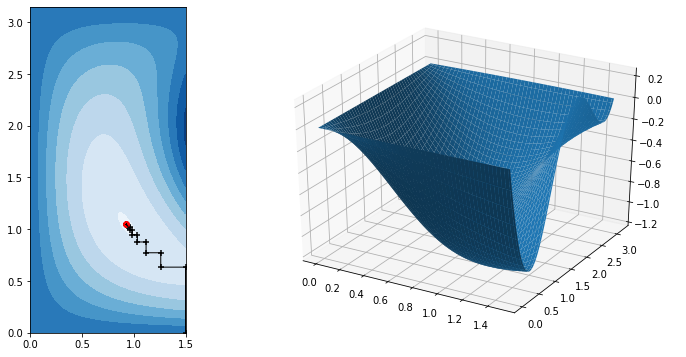

In [0]:
# Plotting
X, Y = np.meshgrid(np.linspace(0,1.5,100), np.linspace(0,3.15,100))
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = A(np.array([X[i,j],Y[i,j]]))

fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(12,6))
gs = axs[0].get_gridspec()
axs[1].remove()
axs[2].remove()
ax1 = axs[0]
ax2 = fig.add_subplot(gs[1:],projection="3d")

# Contour
ax1.contourf(X,Y,Z,cmap="Blues")
ax1.set_xlim(0,1.5)
ax1.set_ylim(0,3.15)

# 3D
ax1.set_aspect("equal")
ax2.plot_surface(X,Y,Z)

# Descent
steps_x, steps_y = zip(*steps)
ax1.scatter(steps_x,steps_y,c="black",marker="+",linewidths=2)
ax1.plot(steps_x,steps_y,c="black",linewidth=1)
ax1.scatter(steps_x[-1],steps_y[-1],c="red")

# Print solution
print("Solution reached: ({:.5f},{:.5f}).".format(steps_x[-1][0],steps_y[-1][0]))
print("Area at solution: {:.5f}.".format(-A(steps[-1])[0]))
print("Slope at solution: ({:.5f},{:.5f}).".format(-grad_A(steps[-1])[0][0],
                                               -grad_A(steps[-1])[1][0]))

# Print table
steps_z = []
for step in steps:
    steps_z.append(-1*A(step))

xyz = np.concatenate((steps_x,steps_y,steps_z),axis=1)
txyz = np.concatenate(([["a","theta","A"]],xyz),axis=0)
table = tabulate(txyz.T[:,:25], tablefmt="fancy_grid", floatfmt = ".2f")
print(table)

# Show plots
plt.show()
